In [1]:
import numpy
import py_entropy
from matplotlib import pyplot
import os

from tqdm.notebook import tqdm

pyplot.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica"
})

In [2]:
output_dir = "merge_single_double_filling"

os.makedirs(output_dir, exist_ok=True)

In [3]:
t = 10000
ne = 1000
n = 50

In [4]:
filename = os.path.join(output_dir, 'single_left.npz')
if os.path.exists(filename):
    arr = numpy.load(filename)
    D1 = arr['D']
    single_purities = arr['data']
else:
    s = py_entropy.MultiDefectState([[0]], numpy.array([1.0], dtype=numpy.complex128), n, 1, num_experiments=ne)
    D1 = s.get_enumerated_states().shape[0]
    single_purities = s.apply_alternative_layers_and_save_mean_purity(t)
    numpy.savez(filename, data=single_purities, D=D1)

In [5]:
filename = os.path.join(output_dir, 'double_left.npz')
if os.path.exists(filename):
    arr = numpy.load(filename)
    D2 = arr['D']
    left_purities = arr['data']
else:
    s = py_entropy.MultiDefectState([[0,1]], numpy.array([1.0], dtype=numpy.complex128), n, 2, num_experiments=ne)
    D2 = s.get_enumerated_states().shape[0]
    left_purities = s.apply_alternative_layers_and_save_mean_purity(t)
    numpy.savez(filename, data=left_purities, D=D2)

In [6]:
filename = os.path.join(output_dir, 'double_sep.npz')
if os.path.exists(filename):
    arr = numpy.load(filename)
    D2 = arr['D']
    sep_purities = arr['data']
else:
    s = py_entropy.MultiDefectState([[0,n-1]], numpy.array([1.0], dtype=numpy.complex128), n, 2, num_experiments=ne)
    D2 = s.get_enumerated_states().shape[0]
    sep_purities = s.apply_alternative_layers_and_save_mean_purity(t)
    numpy.savez(filename, data=sep_purities,D=D2)

In [7]:
filename = os.path.join(output_dir, f'triple_scaling_{n}.npz')
if os.path.exists(filename):
    arr = numpy.load(filename)
    D1 = arr['D']
    three_left_purities = arr['data']
else:
    s = py_entropy.MultiDefectState([[0,1,2]], numpy.array([1.0], dtype=numpy.complex128), n, 3, num_experiments=ne)
    D3 = s.get_enumerated_states().shape[0]
    three_left_purities = s.apply_alternative_layers_and_save_mean_purity(t)
    numpy.savez(filename, data=three_left_purities,D=D3)

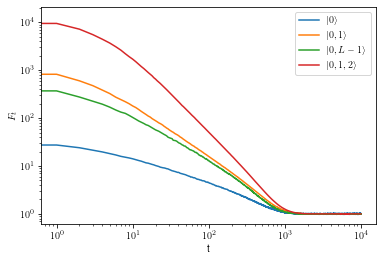

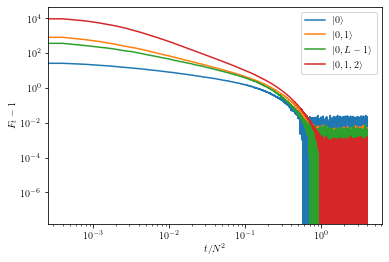

In [8]:
purities = [single_purities, left_purities, sep_purities, three_left_purities]
labels = [r'$\vert 0 \rangle$', r'$\vert 0, 1 \rangle$', r'$\vert 0, L-1 \rangle$', r'$\vert 0,1,2 \rangle$']

for label, purity in zip(labels, purities):
    pyplot.plot(purity, label=label)
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

# for label, purity in zip(labels, purities):
#     pyplot.plot(purity, label=label)
    
# pyplot.xlabel('t')
# pyplot.ylabel('$F_t$')
# pyplot.yscale('log')
# pyplot.legend()
# pyplot.show()

for label, purity in zip(labels, purities):
    pyplot.plot(numpy.arange(len(purity))/n**2, purity - 1.0, label=label)
    
pyplot.xlabel('$t/N^2$')
pyplot.ylabel('$F_t - 1$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

In [9]:
ds = [D1, D2, D2, D3]
purities = [single_purities, left_purities, sep_purities, three_left_purities]
labels = [r'$\vert 0 \rangle$', r'$\vert 0, 1 \rangle$', r'$\vert 0, L-1 \rangle$', r'$\vert 0,1,2 \rangle$']

for d, label, purity in zip(ds, labels, purities):
    pyplot.plot(purity/d, label=label)
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t / D_n$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

# for label, purity in zip(labels, purities):
#     pyplot.plot(purity, label=label)
    
# pyplot.xlabel('t')
# pyplot.ylabel('$F_t$')
# pyplot.yscale('log')
# pyplot.legend()
# pyplot.show()

for d, label, purity in zip(ds, labels, purities):
    pyplot.plot(numpy.arange(len(purity))/n**2, (purity - 1.0)/d, label=label)
    
pyplot.xlabel('$t/N^2$')
pyplot.ylabel('$(F_t - 1)/D_n$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

NameError: name 'D3' is not defined

# Triple defects

$$\rho = \vert 0,1,2 \rangle \langle 0,1,2 \vert$$

In [ ]:
ls = 5*numpy.arange(1,11)

triple_scaling_purities = []
triple_scaling_ds = []
for l in tqdm(ls):
    filename = os.path.join(output_dir, f'triple_scaling_{l}.npz')
    if os.path.exists(filename):
        arr = numpy.load(filename)
        D = arr['D']
        purities = arr['data']
    else:
        s = py_entropy.MultiDefectState([[0,1,2]], numpy.array([1.0], dtype=numpy.complex128), l, 3, num_experiments=ne)
        D = s.get_enumerated_states().shape[0]
        purities = s.apply_alternative_layers_and_save_mean_purity(t)
        numpy.savez(filename, D=D, data=purities)
    triple_scaling_ds.append(D)
    triple_scaling_purities.append(purities)
triple_scaling_ds = numpy.array(triple_scaling_ds)
triple_scaling_purities = numpy.array(triple_scaling_purities)

In [ ]:
for l,pur in zip(ls,triple_scaling_purities):
    pyplot.plot(numpy.arange(len(pur))/l**2, pur - 1.0, label=f'L={l}')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.xlabel('T')
pyplot.ylabel('$F_t - 1$')
pyplot.legend()
pyplot.grid()
pyplot.show()

# Dimer

Compare $$\rho = \vert x \rangle \langle x+1 \vert + \vert x+1 \rangle \langle x \vert$$ to $$\rho = \left(\vert x \rangle + \vert x+1 \rangle\right)\left(\langle x \vert + \langle x+1 \vert\right)$$

In [10]:
ne = 100

filename = os.path.join(output_dir, f'adjusted_dimer_and_dephased.npz')
if os.path.exists(filename):
    arr = numpy.load(filename)
    ls = arr['ls']
    all_purities = arr['data']
    all_mixed_purities = arr['data_mixed']
else:

    ls = 5*numpy.arange(1,21)
    all_purities = []
    all_mixed_purities = []

    for l in tqdm(ls):
        x = (l-1)//2
        y = (l-1)//2 + 1

        amps = numpy.zeros((l,), dtype=numpy.complex128)
        amps[x] = 1/numpy.sqrt(2)
        amps[y] = -1/numpy.sqrt(2)
        s = py_entropy.SingleDefectState.new_mixed([(1.0, amps)], num_experiments=ne)

        purities = s.apply_alternative_layers_and_save_mean_purity(t)
        all_purities.append(purities)

        a_amps = numpy.zeros((l,), dtype=numpy.complex128)
        a_amps[x] = 1.0

        b_amps = numpy.zeros((l,), dtype=numpy.complex128)
        b_amps[y] = 1.0

        s = py_entropy.SingleDefectState.new_mixed([(0.5, a_amps), (0.5, b_amps)], num_experiments=ne)

        purities = s.apply_alternative_layers_and_save_mean_purity(t)
        all_mixed_purities.append(purities)

    all_purities = numpy.array(all_purities)
    all_mixed_purities = numpy.array(all_mixed_purities)
    
    numpy.savez(filename, data=all_purities, data_mixed=all_mixed_purities, ls=ls)

  0%|          | 0/20 [00:00<?, ?it/s]

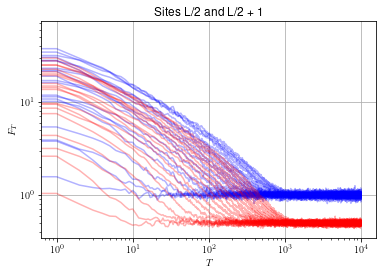

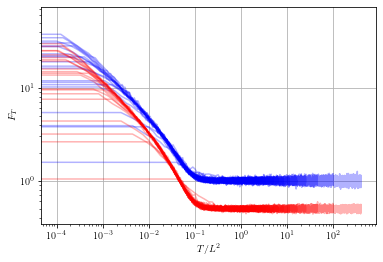

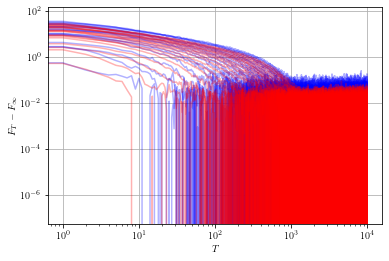

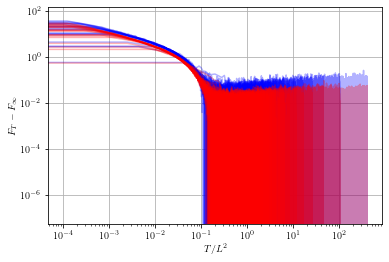

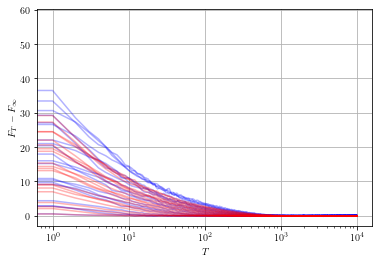

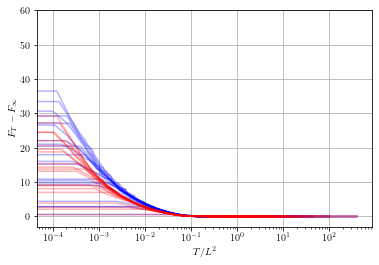

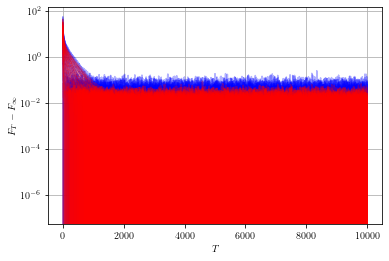

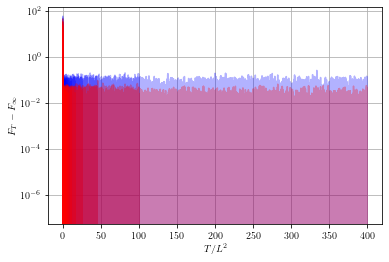

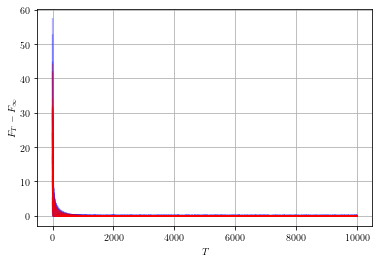

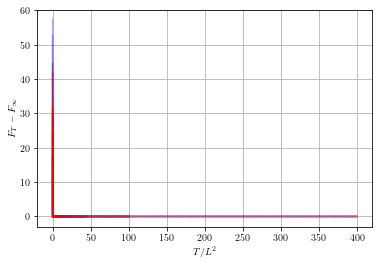

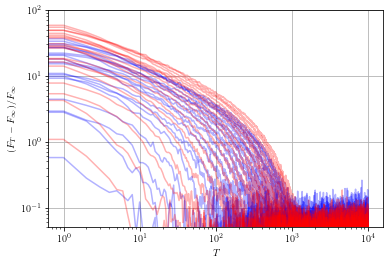

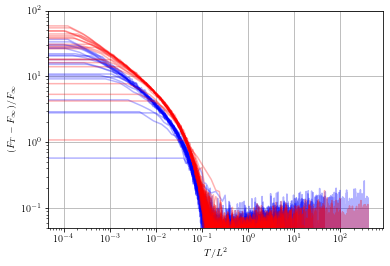

In [11]:
for l,pur in zip(ls, all_purities):
    pyplot.plot(pur, c='blue', alpha=0.3)
for l,pur in zip(ls, all_mixed_purities):
    pyplot.plot(pur, c='red', alpha=0.3)
    
pyplot.grid()
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.ylabel('$F_T$')
pyplot.xlabel('$T$')
pyplot.title(f'Sites L/2 and L/2 + 1')
pyplot.show()

for l,pur in zip(ls, all_purities):
    pyplot.plot(numpy.arange(len(pur))/l**2, pur, c='blue', alpha=0.3)
for l,pur in zip(ls, all_mixed_purities):
    pyplot.plot(numpy.arange(len(pur))/l**2, pur, c='red', alpha=0.3)

pyplot.grid()
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.ylabel('$F_T$')
pyplot.xlabel('$T/L^2$')
pyplot.show()

for l,pur in zip(ls, all_purities):
    pyplot.plot(numpy.arange(len(pur)), pur - 1.0, c='blue', alpha=0.3)
for l,pur in zip(ls, all_mixed_purities):
    pyplot.plot(numpy.arange(len(pur)), pur - 0.5, c='red', alpha=0.3)

pyplot.grid()
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.ylabel('$F_T - F_\infty$')
pyplot.xlabel('$T$')
pyplot.show()

for l,pur in zip(ls, all_purities):
    pyplot.plot(numpy.arange(len(pur))/l**2, pur - 1.0, c='blue', alpha=0.3)
for l,pur in zip(ls, all_mixed_purities):
    pyplot.plot(numpy.arange(len(pur))/l**2, pur - 0.5, c='red', alpha=0.3)

pyplot.grid()
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.ylabel('$F_T - F_\infty$')
pyplot.xlabel('$T/L^2$')
pyplot.show()

for l,pur in zip(ls, all_purities):
    pyplot.plot(numpy.arange(len(pur)), pur - 1.0, c='blue', alpha=0.3)
for l,pur in zip(ls, all_mixed_purities):
    pyplot.plot(numpy.arange(len(pur)), pur - 0.5, c='red', alpha=0.3)

pyplot.grid()
pyplot.xscale('log')
pyplot.ylabel('$F_T - F_\infty$')
pyplot.xlabel('$T$')
pyplot.show()

for l,pur in zip(ls, all_purities):
    pyplot.plot(numpy.arange(len(pur))/l**2, pur - 1.0, c='blue', alpha=0.3)
for l,pur in zip(ls, all_mixed_purities):
    pyplot.plot(numpy.arange(len(pur))/l**2, pur - 0.5, c='red', alpha=0.3)

pyplot.grid()
pyplot.xscale('log')
pyplot.ylabel('$F_T - F_\infty$')
pyplot.xlabel('$T/L^2$')
pyplot.show()

for l,pur in zip(ls, all_purities):
    pyplot.plot(numpy.arange(len(pur)), pur - 1.0, c='blue', alpha=0.3)
for l,pur in zip(ls, all_mixed_purities):
    pyplot.plot(numpy.arange(len(pur)), pur - 0.5, c='red', alpha=0.3)

pyplot.grid()
pyplot.yscale('log')
pyplot.ylabel('$F_T - F_\infty$')
pyplot.xlabel('$T$')
pyplot.show()

for l,pur in zip(ls, all_purities):
    pyplot.plot(numpy.arange(len(pur))/l**2, pur - 1.0, c='blue', alpha=0.3)
for l,pur in zip(ls, all_mixed_purities):
    pyplot.plot(numpy.arange(len(pur))/l**2, pur - 0.5, c='red', alpha=0.3)

pyplot.grid()
pyplot.yscale('log')
pyplot.ylabel('$F_T - F_\infty$')
pyplot.xlabel('$T/L^2$')
pyplot.show()

for l,pur in zip(ls, all_purities):
    pyplot.plot(numpy.arange(len(pur)), pur - 1.0, c='blue', alpha=0.3)
for l,pur in zip(ls, all_mixed_purities):
    pyplot.plot(numpy.arange(len(pur)), pur - 0.5, c='red', alpha=0.3)

pyplot.grid()
pyplot.ylabel('$F_T - F_\infty$')
pyplot.xlabel('$T$')
pyplot.show()

for l,pur in zip(ls, all_purities):
    pyplot.plot(numpy.arange(len(pur))/l**2, pur - 1.0, c='blue', alpha=0.3)
for l,pur in zip(ls, all_mixed_purities):
    pyplot.plot(numpy.arange(len(pur))/l**2, pur - 0.5, c='red', alpha=0.3)

pyplot.grid()
pyplot.ylabel('$F_T - F_\infty$')
pyplot.xlabel('$T/L^2$')
pyplot.show()


for l,pur in zip(ls, all_purities):
    pyplot.plot(numpy.arange(len(pur)), (pur - 1.0)/1.0, c='blue', alpha=0.3)
for l,pur in zip(ls, all_mixed_purities):
    pyplot.plot(numpy.arange(len(pur)), (pur - 0.5)/0.5, c='red', alpha=0.3)

pyplot.grid()
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.ylim([5e-2,1e2])
pyplot.ylabel('$(F_T - F_\infty)/F_\infty$')
pyplot.xlabel('$T$')
pyplot.show()

for l,pur in zip(ls, all_purities):
    pyplot.plot(numpy.arange(len(pur))/l**2,(pur - 1.0)/1.0,  c='blue', alpha=0.3)
for l,pur in zip(ls, all_mixed_purities):
    pyplot.plot(numpy.arange(len(pur))/l**2, (pur - 0.5)/0.5, c='red', alpha=0.3)

pyplot.grid()
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.ylim([5e-2,1e2])
pyplot.ylabel('$(F_T - F_\infty)/F_\infty$')
pyplot.xlabel('$T/L^2$')
pyplot.show()

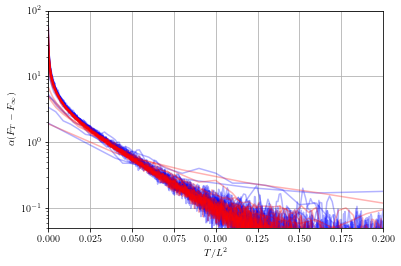

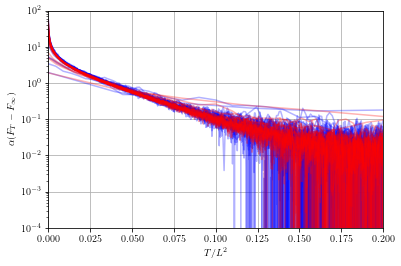

In [12]:
for l,pur in zip(ls, all_purities):
    pyplot.plot(numpy.arange(len(pur))/l**2,(pur - 1.0),  c='blue', alpha=0.3)
for l,pur in zip(ls, all_mixed_purities):
    pyplot.plot(numpy.arange(len(pur))/l**2, (pur - 0.5)*1.27, c='red', alpha=0.3)

pyplot.grid()
pyplot.yscale('log')
pyplot.xlim([0,2e3/ls[-1]**2])
pyplot.ylim([5e-2,1e2])
pyplot.ylabel(r'$\alpha(F_T - F_\infty)$')
pyplot.xlabel('$T/L^2$')
pyplot.show()

for l,pur in zip(ls, all_purities):
    pyplot.plot(numpy.arange(len(pur))/l**2,(pur - 1.0),  c='blue', alpha=0.3)
for l,pur in zip(ls, all_mixed_purities):
    pyplot.plot(numpy.arange(len(pur))/l**2, (pur - 0.5)*1.27, c='red', alpha=0.3)

pyplot.grid()
pyplot.yscale('log')
pyplot.xlim([0,2e3/ls[-1]**2])
pyplot.ylim([1e-4,1e2])
pyplot.ylabel(r'$\alpha(F_T - F_\infty)$')
pyplot.xlabel('$T/L^2$')
pyplot.show()

In [13]:
ne = 100


filename = os.path.join(output_dir, f'dimer_and_dephased_opp.npz')
if os.path.exists(filename):
    arr = numpy.load(filename)
    ls = arr['ls']
    all_purities = arr['data']
    all_mixed_purities = arr['data_mixed']
else:
    ls = 5*numpy.arange(1,21)
    all_purities = []
    all_mixed_purities = []
    for l in tqdm(ls):
        x = 0
        y = l-1

        amps = numpy.zeros((l,), dtype=numpy.complex128)
        amps[x] = 1/numpy.sqrt(2)
        amps[y] = -1/numpy.sqrt(2)
        s = py_entropy.SingleDefectState.new_mixed([(1.0, amps)], num_experiments=ne)

        purities = s.apply_alternative_layers_and_save_mean_purity(t)
        all_purities.append(purities)

        a_amps = numpy.zeros((l,), dtype=numpy.complex128)
        a_amps[x] = 1.0

        b_amps = numpy.zeros((l,), dtype=numpy.complex128)
        b_amps[y] = 1.0

        s = py_entropy.SingleDefectState.new_mixed([(0.5, a_amps), (0.5, b_amps)], num_experiments=ne)

        purities = s.apply_alternative_layers_and_save_mean_purity(t)
        all_mixed_purities.append(purities)

    all_purities = numpy.array(all_purities)
    all_mixed_purities = numpy.array(all_mixed_purities)
    
    numpy.savez(filename, data=all_purities, data_mixed=all_mixed_purities, ls=ls)

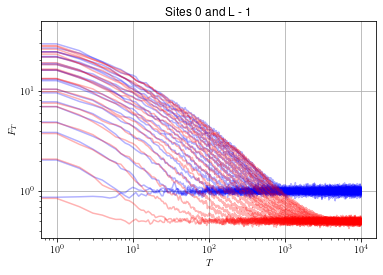

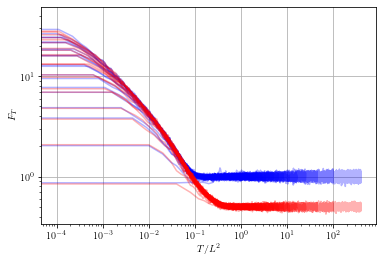

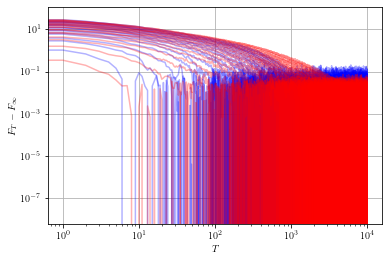

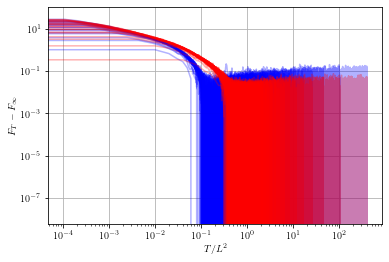

In [14]:
for l,pur in zip(ls, all_purities):
    pyplot.plot(pur, c='blue', alpha=0.3)
for l,pur in zip(ls, all_mixed_purities):
    pyplot.plot(pur, c='red', alpha=0.3)
    
pyplot.grid()
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.ylabel('$F_T$')
pyplot.xlabel('$T$')
pyplot.title(f'Sites 0 and L - 1')
pyplot.show()

for l,pur in zip(ls, all_purities):
    pyplot.plot(numpy.arange(len(pur))/l**2, pur, c='blue', alpha=0.3)
for l,pur in zip(ls, all_mixed_purities):
    pyplot.plot(numpy.arange(len(pur))/l**2, pur, c='red', alpha=0.3)

pyplot.grid()
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.ylabel('$F_T$')
pyplot.xlabel('$T/L^2$')
pyplot.show()


for l,pur in zip(ls, all_purities):
    pyplot.plot(numpy.arange(len(pur)), pur - 1.0, c='blue', alpha=0.3)
for l,pur in zip(ls, all_mixed_purities):
    pyplot.plot(numpy.arange(len(pur)), pur - 0.5, c='red', alpha=0.3)

pyplot.grid()
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.ylabel('$F_T - F_\infty$')
pyplot.xlabel('$T$')
pyplot.show()

for l,pur in zip(ls, all_purities):
    pyplot.plot(numpy.arange(len(pur))/l**2, pur - 1.0, c='blue', alpha=0.3)
for l,pur in zip(ls, all_mixed_purities):
    pyplot.plot(numpy.arange(len(pur))/l**2, pur - 0.5, c='red', alpha=0.3)

pyplot.grid()
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.ylabel('$F_T - F_\infty$')
pyplot.xlabel('$T/L^2$')
pyplot.show()